## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [2]:
raw_csv_data = pd.read_csv("data/Index2018.csv") 
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [5]:
import warnings
warnings.filterwarnings("ignore")

## Creating Returns

In [6]:
df['returns'] = df.market_value.pct_change(1) * 100

## Creating Squared Returns

In [7]:
df['sq_returns'] = df.returns.mul(df.returns)

## Returns vs Squared Returns

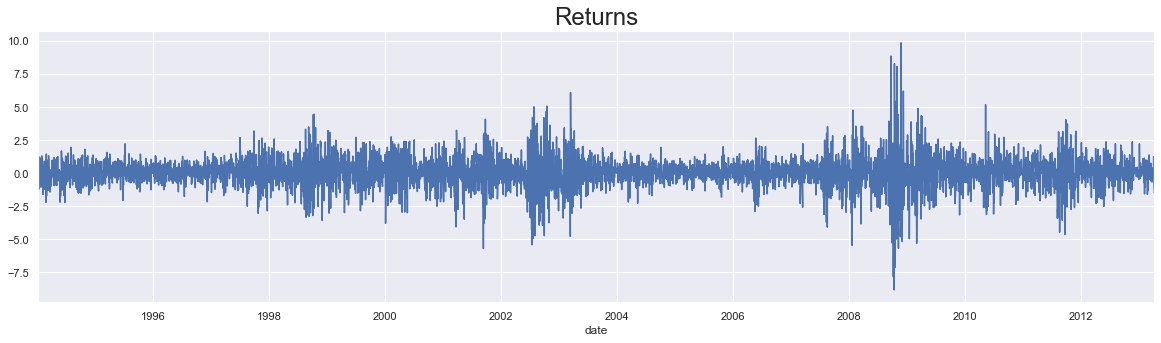

In [8]:
df.returns.plot(figsize = (20, 5))
plt.title('Returns', size = 24)
plt.show()

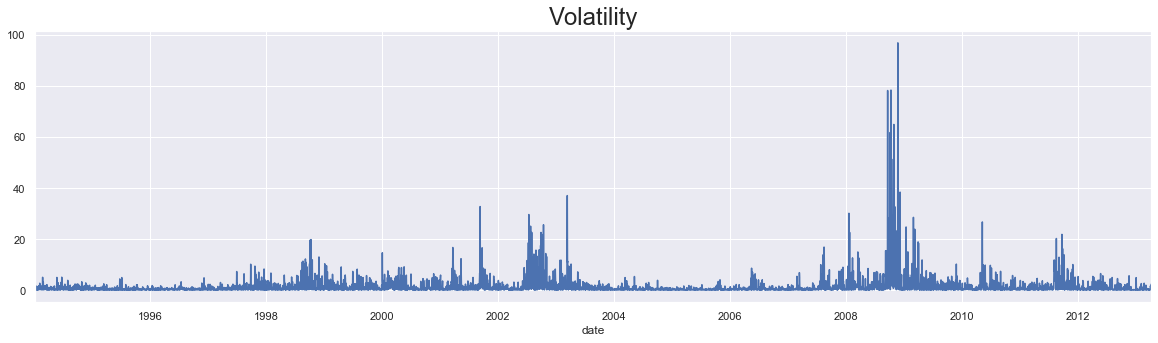

In [9]:
df.sq_returns.plot(figsize = (20, 5))
plt.title('Volatility', size = 24)
plt.show()

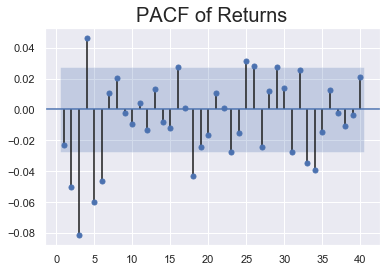

In [10]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title('PACF of Returns', size = 20)
plt.show()

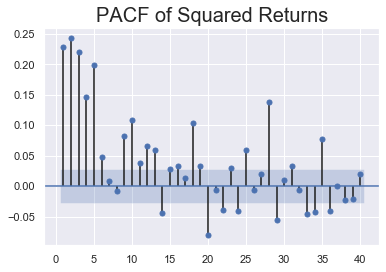

In [11]:
sgt.plot_pacf(df.sq_returns[1:], lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title('PACF of Squared Returns', size = 20)
plt.show()